### Extract data from database

In [122]:
import mariadb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Connection to server**

In [2]:
try:
    conn = mariadb.connect(
        user="guest",
        password="relational",
        host="relational.fit.cvut.cz",
        port=3306,
        database="ftp"
    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()

**Converting from sql result to pandas DataFrame**

In [3]:
SQL_Query_session = pd.read_sql_query('''select * from session''', conn)
SQL_Query_product = pd.read_sql_query('''select * from product''', conn)

In [4]:
df_session = pd.DataFrame(SQL_Query_session)
df_product = pd.DataFrame(SQL_Query_product)

**Saving data in csv format**

In [5]:
df_session.to_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\session_data.csv', index=False)
df_product.to_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\product_data.csv', index=False)

In [6]:
df_session = pd.read_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\session_data.csv')
df_product = pd.read_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\product_data.csv')

In [19]:
df_general = df_product.merge(df_session, on='session_id', validate='many_to_one')

In [20]:
df_general['category_a'].value_counts().values

array([42801, 10877,  9448,  1096,   877,   574,   266,   200,   138,
         125,    89], dtype=int64)

**Review raw data**

In [21]:
df_general.head()

,session_id,sequence_order,category_a,category_b,category_c,category_d,start_time,end_time,gender
0,u10001,1,A00001,B00001,C00001,D00001,2014-11-14 00:02:14,2014-11-14 00:02:20,female
1,u10002,1,A00002,B00002,C00002,D24897,2014-12-12 14:12:05,2014-12-12 14:12:06,female
2,u10003,1,A00002,B00002,C00002,D00002,2014-11-14 00:02:41,2014-11-14 00:16:40,female
3,u10003,2,A00002,B00002,C00003,D00003,2014-11-14 00:02:41,2014-11-14 00:16:40,female
4,u10003,3,A00002,B00002,C00007,D00007,2014-11-14 00:02:41,2014-11-14 00:16:40,female


In [22]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66491 entries, 0 to 66490
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_id      66491 non-null  object
 1   sequence_order  66491 non-null  int64 
 2   category_a      66491 non-null  object
 3   category_b      66491 non-null  object
 4   category_c      66491 non-null  object
 5   category_d      66491 non-null  object
 6   start_time      66491 non-null  object
 7   end_time        66491 non-null  object
 8   gender          33455 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.1+ MB


In [23]:
df_general.groupby('gender').count()

,session_id,sequence_order,category_a,category_b,category_c,category_d,start_time,end_time
gender,,,,,,,,
female,26384,26384,26384,26384,26384,26384,26384,26384
male,7071,7071,7071,7071,7071,7071,7071,7071


In [25]:
df_general['category_a'].nunique()

11

## Processing data

*-select essential columns*

*-create new features*

In [26]:
df_gen_train = df_general.dropna()

In [27]:
df_gen_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33455 entries, 0 to 33454
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_id      33455 non-null  object
 1   sequence_order  33455 non-null  int64 
 2   category_a      33455 non-null  object
 3   category_b      33455 non-null  object
 4   category_c      33455 non-null  object
 5   category_d      33455 non-null  object
 6   start_time      33455 non-null  object
 7   end_time        33455 non-null  object
 8   gender          33455 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.6+ MB


In [35]:
duration = (pd.to_datetime(df_gen_train['end_time'])-
                            pd.to_datetime(df_gen_train['start_time'])).apply(lambda i: 
                                                                              i.total_seconds() / 60.0)
df_gen_train['duration'] = duration
df_gen_train.head()

C:\Users\Tema\anaconda3\envs\cinimex\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,session_id,sequence_order,category_a,category_b,category_c,category_d,start_time,end_time,gender,duration
0,u10001,1.0,A00001,B00001,C00001,D00001,2014-11-14 00:02:14,2014-11-14 00:02:20,female,0.100000
1,u10002,1.0,A00002,B00002,C00002,D24897,2014-12-12 14:12:05,2014-12-12 14:12:06,female,0.016667
2,u10003,1.0,A00002,B00002,C00002,D00002,2014-11-14 00:02:41,2014-11-14 00:16:40,female,13.983333
3,u10003,2.0,A00002,B00002,C00003,D00003,2014-11-14 00:02:41,2014-11-14 00:16:40,female,13.983333
4,u10003,3.0,A00002,B00002,C00007,D00007,2014-11-14 00:02:41,2014-11-14 00:16:40,female,13.983333


In [66]:
df_orders = df_gen_train.groupby('session_id')\
                        .nunique()\
                        .drop(labels=['start_time', 'end_time', 'gender',
                                      'duration', 'sequence_order'], axis=1)
df_duration = df_gen_train.groupby('session_id').mean()['duration']

**Merging data of categories's view and session's duration**

In [68]:
df_final = df_orders.merge(df_duration, on='session_id')
df_final = df_final.merge(df_gen_train[['session_id','gender']]\
                          .drop_duplicates(), on='session_id')
df_final.head()

,session_id,category_a,category_b,category_c,category_d,duration,gender
0,u10001,1,1,1,1,0.100000,female
1,u10002,1,1,1,1,0.016667,female
2,u10003,1,1,6,12,13.983333,female
3,u10004,1,1,1,1,0.033333,female
4,u10005,1,1,2,3,3.283333,female


In [69]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_y = labelencoder.fit_transform(df_final['gender'])
data_y

array([0, 0, 0, ..., 0, 0, 1])

In [70]:
data_x = np.array(df_final.drop(columns=['gender','session_id']))

In [241]:
shuff_indexes = np.arange(data_y.shape[0])
np.random.shuffle(shuff_indexes)

In [242]:
X_, y_ = data_x[shuff_indexes], data_y[shuff_indexes]

In [243]:
from sklearn.preprocessing import StandardScaler

In [244]:
def cross_validation(func):
    def wrapper(X, y, folds, *args):
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        size = X.shape[0]/folds
        score = []

        for i in range(1, folds):
            index_prev = int(size*i)
            index_next = int(size*(i+1))
            train_X, test_X = np.concatenate((X[:index_prev], X[index_next:])), X[index_prev:index_next]
            train_Y, test_Y = np.concatenate((y[:index_prev], y[index_next:])), y[index_prev:index_next]
            score.append(func(train_X,train_Y, test_X, test_Y, *args))
        return np.array(score).mean()
    return wrapper

### Knn classifier

In [245]:
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

In [246]:
@cross_validation
def KNN(train_X, train_Y, test_X, test_Y, metric='accuracy', k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    if (metric == 'accuracy'):
        return knn.score(test_X, test_Y)
    elif (metric == 'auc'):
        return roc_auc_score(knn.predict(test_X), test_Y)

**Define best hyperparametr k**

In [247]:
knn_scores = []
for i in tqdm(range(1, 40)):
    knn_scores.append({'k': i, 'accuracy': KNN(X_, y_, 4, 'auc',i)})

100%|██████████| 39/39 [01:10<00:00,  1.82s/it]


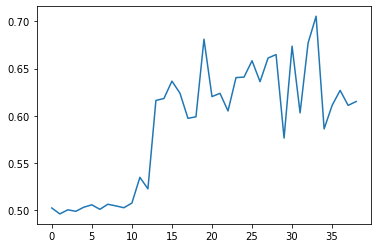

In [248]:
plt.plot(list(map(lambda i: i['accuracy'], knn_scores)))

In [249]:
print('Best k-parametr is', np.argmax(list(map(lambda i: i['accuracy'], knn_scores)))+1)

Best k-parametr is 34


**Saving knn model**

In [250]:
scaler = StandardScaler().fit(X_)

X__ = scaler.transform(X_)

In [251]:
import pickle
filename_knn = 'knn_model.sav'
filename_scaler = 'scaler_model.sav'

In [252]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X__, y_)
# scores.append(neigh.score(test_scal, test_YYY))

KNeighborsClassifier(n_neighbors=34)

In [253]:
print(classification_report(y_, knn.predict(X__)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     11703
           1       0.55      0.01      0.01      3297

    accuracy                           0.78     15000
   macro avg       0.67      0.50      0.44     15000
weighted avg       0.73      0.78      0.69     15000



In [254]:
pickle.dump(scaler, open(filename_scaler, 'wb'))
pickle.dump(knn, open(filename_knn, 'wb'))

### Logistic regression

In [192]:
from sklearn.linear_model import LogisticRegression

In [200]:
# clf = LogisticRegression(random_state=0).fit(X, y)
@cross_validation
def LogReg(train_X, train_Y, test_X, test_Y):
    log_reg = LogisticRegression().fit(train_X, train_Y)
    return log_reg.score(test_X, test_Y)

In [201]:
LogReg(X, y, 5)

0.781

In [206]:
log_reg = LogisticRegression().fit(X__[:int(X.shape[0]*0.75)], y[:int(X.shape[0]*0.75)])

In [212]:
np.sum(log_reg.predict(X__[int(X.shape[0]*0.75):])==1)

0

In [215]:
# import seaborn as sns

# sns.set(font_scale=1.5)
# sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y[int(X.shape[0]*0.75):], log_reg.predict_proba(X__[int(X.shape[0]*0.75):])[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

NameError: name 'roc_curve' is not defined

<Figure size 720x576 with 0 Axes>

In [216]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [218]:
print('Classification Report : ')
print(classification_report(y[int(X.shape[0]*0.75):], log_reg.predict(X__[int(X.shape[0]*0.75):])))
print('AUC-ROC:',roc_auc_score(y[int(X.shape[0]*0.75):], log_reg.predict(X__[int(X.shape[0]*0.75):])))

Classification Report : 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2917
           1       0.00      0.00      0.00       833

    accuracy                           0.78      3750
   macro avg       0.39      0.50      0.44      3750
weighted avg       0.61      0.78      0.68      3750

AUC-ROC: 0.5


C:\Users\Tema\anaconda3\envs\cinimex\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
print('Classification Report : ')
print(classification_report(y[int(X.shape[0]*0.75):], knn.predict(X__[int(X.shape[0]*0.75):])))
print('AUC-ROC:',roc_auc_score(y[int(X.shape[0]*0.75):], knn.predict(X__[int(X.shape[0]*0.75):])))

Classification Report : 
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2917
           1       0.25      0.00      0.01       833

    accuracy                           0.78      3750
   macro avg       0.51      0.50      0.44      3750
weighted avg       0.66      0.78      0.68      3750

AUC-ROC: 0.500344052602186


In [228]:
@cross_validation
def RandomForest(train_X, train_Y, test_X, test_Y, metric,estim=50):
    rfc = RandomForestClassifier(n_estimators=estim)
    rfc.fit(train_X, train_Y)
    if (metric == 'accuracy'):
        return rfc.score(test_X, test_Y)
    elif (metric == 'auc'):
        return roc_auc_score(rfc.predict(test_X), test_Y)

In [231]:
RandomForest(X, y, 4, metric='auc')

0.5094295423634929

In [232]:
KNN(X, y, 4, 21, metric='auc')

TypeError: wrapper() got an unexpected keyword argument 'metric'

In [230]:
from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators = 50)
# rfc.fit(X_train, y_train)